# LOGISTIC REGRESSION

Logistic regression (aka logit regression or logit model) was developed by statistician David Cox in 1958 and is a regression model where the response variable Y is categorical. Logistic regression allows us to estimate the probability of a categorical response based on one or more predictor variables (X). It allows one to say that the presence of a predictor increases (or decreases) the probability of a given outcome by a specific percentage. This tutorial covers the case when Y is binary — that is, where it can take only two values, “0” and “1”, which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed with multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression. However, discriminant analysis has become a popular method for multi-class classification so our next tutorial will focus on that technique for those instances.

In [44]:
install.packages("ROCR")
install.packages('caTools')


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [45]:
library(tidyverse)
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs
library(caTools)
library(ROCR)

This tutorial primarily leverages the Default data provided by the ISLR package. This is a simulated data set containing information on ten thousand customers such as whether the customer defaulted, is a student, the average balance carried by the customer and the income of the customer. We’ll also use a few packages that provide data manipulation, visualization, pipeline modeling functions, and model output tidying functions.

In [47]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)

In [5]:
default <- as_tibble(ISLR::Default)
head(default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [9]:
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(default), replace = T, prob = c(0.6,0.4))
train <- default[sample, ]
test <- default[!sample, ]
head(train)

default,student,balance,income
No,No,729.5265,44361.625
No,No,1073.5492,31767.139
No,Yes,919.5885,7491.559
No,No,825.5133,24905.227
No,No,1161.0579,37468.529
No,No,0.0000,29275.268


We will fit a logistic regression model in order to predict the probability of a customer defaulting based on the average balance carried by the customer. The glm function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm function is similar to that of lm, except that we must pass the argument family = binomial in order to tell R to run a logistic regression rather than some other type of generalized linear mode

In [11]:
model1 <- glm(default ~ balance, family = "binomial", data = train)

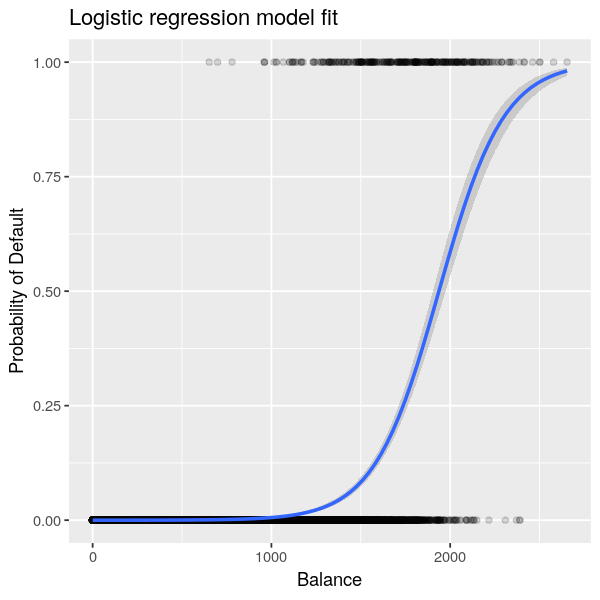

In [48]:
default %>%
  mutate(prob = ifelse(default == "Yes", 1, 0)) %>%
  ggplot(aes(balance, prob)) +
  geom_point(alpha = .15) +
  geom_smooth(method = "glm", method.args = list(family = "binomial")) +
  ggtitle("Logistic regression model fit") +
  xlab("Balance") +
  ylab("Probability of Default")

In [15]:
tidy(model1)

term,estimate,std.error,statistic,p.value
(Intercept),-11.006277528,0.488739437,-22.51972,2.660162e-112
balance,0.005668817,0.000294946,19.21985,2.525157e-82


In [16]:
exp(coef(model1))

(Intercept)      balance 
1.659718e-05 1.005685e+00

We can further interpret the balance coefficient as - for every one dollar increase in monthly balance carried, the odds of the customer defaulting increases by a factor of 1.0057.



In [17]:
confint(model1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-12.007610373,-10.089360652
balance,0.005111835,0.006269411


For example, we can measure the confidence intervals and accuracy of the coefficient estimates by computing their standard errors. For instance, 
^
β
1
 has a p-value < 2e-16 suggesting a statistically significant relationship between balance carried and the probability of defaulting. 

In [20]:
predict(model1, data.frame(balance = c(1000, 2000)), type = "response")

1           2 
0.004785057 0.582089269

# Multiple Logistic Regression

In [21]:
data = read_csv("data/diabetes_log_r.csv")

Parsed with column specification:
cols(
  Pregnancies = col_double(),
  Glucose = col_double(),
  BloodPressure = col_double(),
  SkinThickness = col_double(),
  Insulin = col_double(),
  BMI = col_double(),
  DiabetesPedigreeFunction = col_double(),
  Age = col_double(),
  Outcome = col_double()
)


In [22]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [23]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

- We are predicting whether a person has diabetes or not
- Outcome 0 : Not Diabetic
- Outcome 1 : Diabetic

In [24]:
split <- sample.split(data$Outcome, SplitRatio = 0.75)

In [25]:
#GET TRAINING DATA AND TESTING DATA
data_train <- subset(data, split == TRUE)
data_test <- subset(data, split == FALSE)

In [26]:
dim(data_train)

[1] 576   9

In [27]:
dim(data_test)

[1] 192   9

In [30]:
## COLUMN NAMES
names(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [31]:
## LOGISTIC REGRESSION MODEL
logit <- glm (Outcome ~Pregnancies +Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age,
                 data = data_train, family = binomial)

In [32]:
summary(logit)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + 
    Age, family = binomial, data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5647  -0.7374  -0.4328   0.7582   2.9431  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.220066   0.808624 -10.166  < 2e-16 ***
Pregnancies               0.115334   0.035752   3.226  0.00126 ** 
Glucose                   0.035070   0.004232   8.287  < 2e-16 ***
BloodPressure            -0.011440   0.005842  -1.958  0.05022 .  
SkinThickness             0.003715   0.007822   0.475  0.63483    
Insulin                  -0.001836   0.001073  -1.711  0.08702 .  
BMI                       0.075934   0.016272   4.667 3.06e-06 ***
DiabetesPedigreeFunction  1.068568   0.355411   3.007  0.00264 ** 
Age                       0.017272   0.010481   1.648  0.09936 .  
---
Signif. codes:

In [33]:
## PREDICTING THE PROBABILITIES
predicted_prob <- predict(logit,type = 'response', newdata=data_test[1:8])


In [34]:
head(predicted_prob)

1         2         3         4         5         6 
0.9034414 0.2016297 0.8834014 0.8138040 0.5247242 0.6389926

In [36]:
## CONVERTING PROBABILITY TO PREDICTED OUTCOME
predicted_outcome = ifelse(predicted_prob>0.5,1,0)
head(predicted_outcome)

1 2 3 4 5 6 
1 0 1 1 1 1

## CONFUSION MATRIX
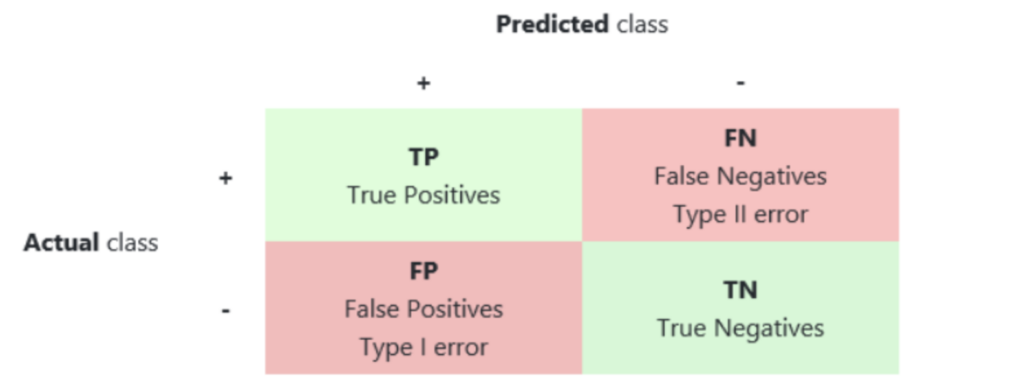

- **true positives** (Top-right quadrant): these are cases in which we predicted the customer would default and they did.
- **true negatives** (Bottom-left quadrant): We predicted no default, and the customer did not default.
- **false positives** (Bottom-right quadrant): We predicted yes, but they didn’t actually default. 
- **false negatives** (Top-left): We predicted no, but they did default. 

In [39]:
## CREATION OF CONFUSION MATRIX
confusion_matrix = table(data_test$Outcome,predicted_outcome)
confusion_matrix

   predicted_outcome
      0   1
  0 112  13
  1  33  34

 Accuracy = 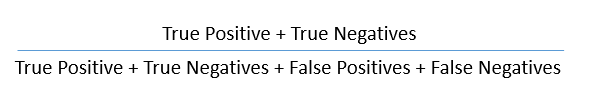

In [40]:
## CALCULATION OF ACCURACY
accuracy = (112+40) / (112+13+27+40)
accuracy

[1] 0.7916667

### ROC determines the accuracy of a classification model at a user defined threshold value. 
It determines the model's accuracy using Area Under Curve (AUC). Higher the area, better the model. ROC is plotted between True Positive Rate (Y axis) and False Positive Rate (X Axis). 

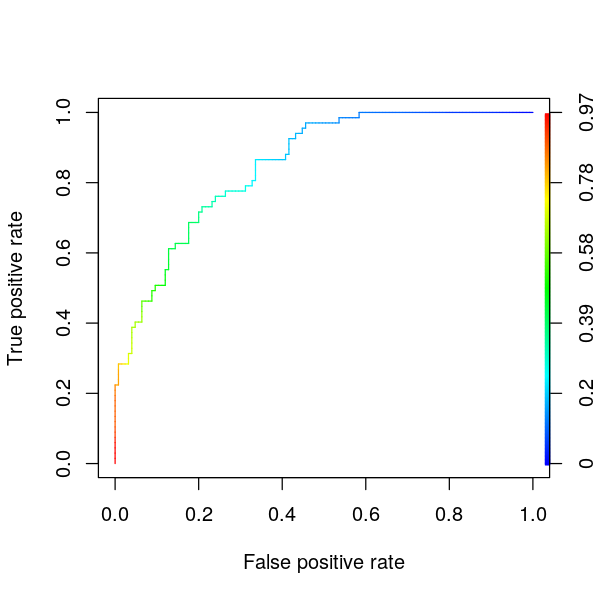

In [49]:
#ROCR Curve

ROCRpred <- prediction(predicted_prob, data_test$Outcome)
ROCRperf <- performance(ROCRpred, 'tpr','fpr')
plot(ROCRperf, colorize = TRUE )